# Data Analysis

This jupyter notebook demonstrates different ways the Market() class can simulate supplier behaviors. Three topics will be covered:
- How cost affects quantity supplied and revenue
- How competition affects quantity supplied and revenue
- How shifts in demand affect the quantity supplied and revenue
---

## 1. Imports

The project uses two 3rd party packages and the class defined in the `sessionmaker.py` file:
- Matplotlib: Package that creates visuals for data
- Numpy: Package that defines the `ndarray` class, which makes list arithmetic easier
- Market: Class defined in `sessionmaker.py` that defines a market with certain companies with different cost equations and customers with diffent needs

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sessionmaker import Market

## 2. Change in Cost

Describe Current Research

Plan: Create 3 scenarios and show the quantity and revenues


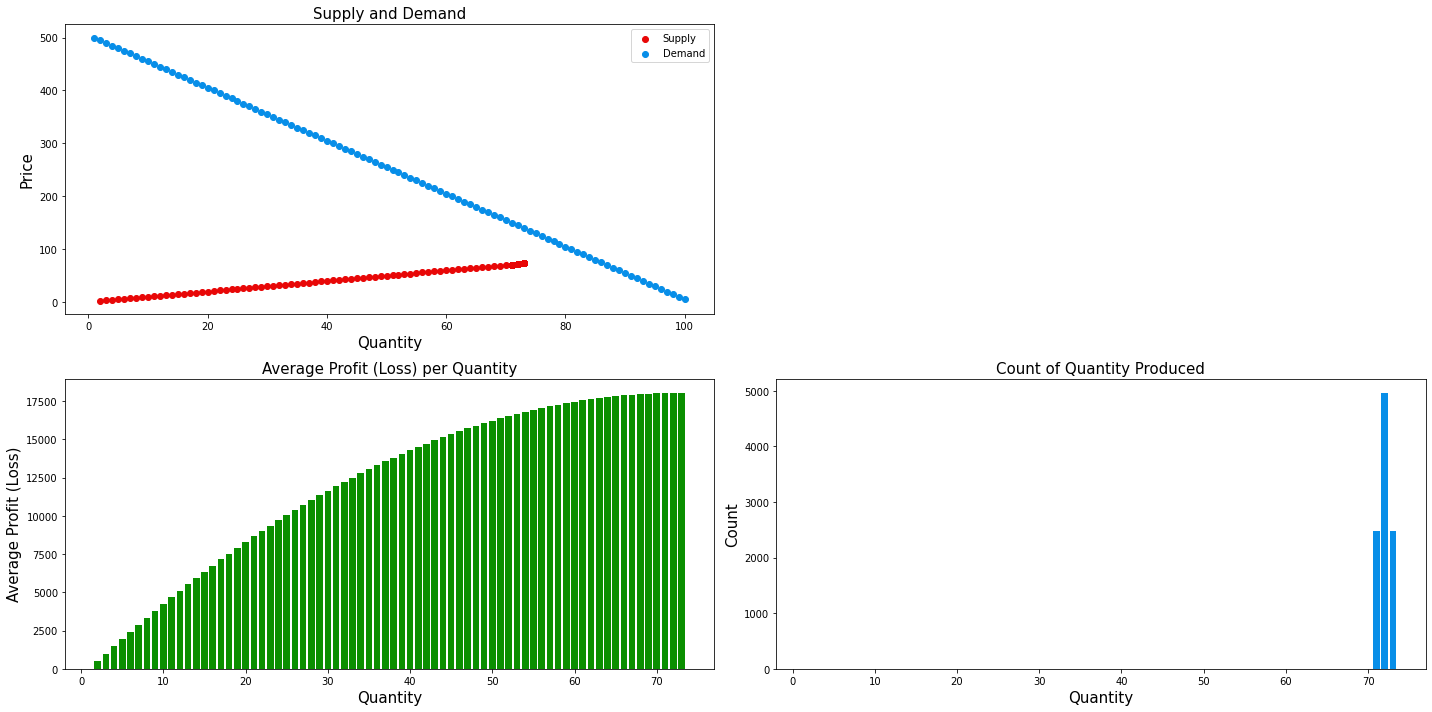

In [7]:
# Defining Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 1', lambda x: x**2)

# General Data extraction:
quantity_sold = []
price_per_item = []
profits = {}


for i in range(10000):
    m1.session()
    data = m1.sellers['Company 1']
    
    quantity_sold.append(data['Quantity'])
    price_per_item.append(data['Costs'](data['Quantity'])/data['Quantity'])
    
    if data['Quantity'] not in profits:
        profits[data['Quantity']] = []
    
    profits[data['Quantity']].append(data['Previous Profit'])

# Supply and Demand Extraction
buyer_prices = np.array(sorted(m1.buyer_prices)[::-1])
buyer_quantities = [i + 1 for i in range(len(buyer_prices))]

# Quantity Charts/Profit Simplification
names = profits.keys()
for quantity in names:
    count = len(profits[quantity])
    average = sum(profits[quantity])/count
    
    profits[quantity] = (count, average)

#print(f'Quantity: {quantity_sold}')
#print(f'Profits: {profits}')
#print(f'Prices: {price_per_item}')
#print(f'Buyers {buyer_prices}\n{buyer_quantities}')

# Graph Definitions: Line graph showing supply and demand, graph with average profits at different quantities, and graph with average quantities produced
fig, ((ax1, ax4), (ax2, ax3)) = plt.subplots(2, 2, height_ratios=[10,10], facecolor='#ffffff')
ax4.remove()
fig.set_figwidth(20)
fig.set_figheight(10)

## Supply and Demand
ax1.scatter(quantity_sold, price_per_item, label='Supply', c='#e80707')
ax1.scatter(buyer_quantities, buyer_prices, label='Demand', c='#078ee8')

ax1.set_title('Supply and Demand', fontsize=15, color='#000000')
ax1.set_xlabel('Quantity', fontsize=15, color='#000000')
ax1.set_ylabel('Price', fontsize=15, color='#000000')

ax1.legend()

## Quantity v Profits
quantities = profits.keys()
prices = [val[1] for val in profits.values()]
colors = ['#0a8f00' if i >= 0 else '#e80707' for i in prices]

ax2.bar(quantities, prices, color=colors)

ax2.set_title('Average Profit (Loss) per Quantity', fontsize=15, color='#000000')
ax2.set_xlabel('Quantity', fontsize=15, color='#000000')
ax2.set_ylabel('Average Profit (Loss)', fontsize=15, color='#000000')

## Quantity v Instance
counts = [val[0] for val in profits.values()]
ax3.bar(quantities, counts, color='#078ee8')

ax3.set_title('Count of Quantity Produced', fontsize=15, color='#000000')
ax3.set_xlabel('Quantity', fontsize=15, color='#000000')
ax3.set_ylabel('Count', fontsize=15, color='#000000')

plt.tight_layout()
plt.show()